In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
#0 악성, 1 양성
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pre = model.predict(X_test)

In [25]:
pre

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [8]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [26]:
np.bincount(y_test)

array([53, 90], dtype=int64)

In [27]:
np.bincount(pre)

array([57, 86], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

- 0,0 : 실제 악성, 예측 악성
- 0,1 : 실제 악성, 예측 양성
- 1,0 : 실제 양성, 예측 악성
- 1,1 : 실제 양성, 예측 양성

In [29]:
confusion_matrix(y_test, pre)

array([[52,  1],
       [ 5, 85]], dtype=int64)

In [33]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### ROC 커브

In [34]:
from sklearn.metrics import roc_curve

In [36]:
fpr,tpr, th = roc_curve(y_test,model.decision_function(X_test))

In [37]:
fpr.shape, tpr.shape, th.shape

((10,), (10,), (10,))

In [38]:
fpr

array([0.        , 0.        , 0.        , 0.01886792, 0.01886792,
       0.03773585, 0.03773585, 0.20754717, 0.20754717, 1.        ])

In [45]:
model = LogisticRegression(C=0.0001)
model.fit(X_train, y_train)
fpr1, tpr1, th = roc_curve(y_test,model.decision_function(X_test))

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


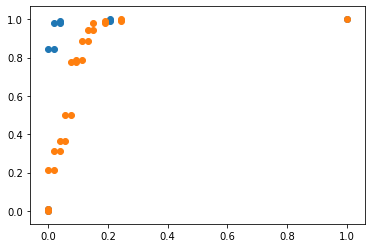

In [47]:
plt.scatter(fpr, tpr)
plt.scatter(fpr1, tpr1)

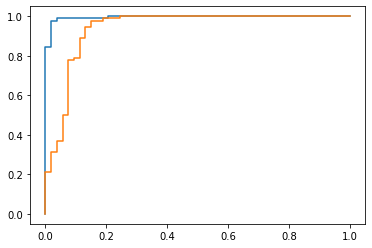

In [46]:
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)

In [57]:
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_val_score

In [59]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [56]:
C_list = [0.0001,0.001,0.01,0.1,1,10,100]
for c in C_list:
    model = LogisticRegression(C=c)
    result = cross_val_score(model, X_train, y_train, cv=5 , scoring="neg_mean_squared_error")
    print("c: {} \t score: {}".format(c,-result.mean()))

c: 0.0001 	 score: 0.08213862289101687
c: 0.001 	 score: 0.07989577226239333
c: 0.01 	 score: 0.07516187870497036
c: 0.1 	 score: 0.06558334961891733
c: 1 	 score: 0.049276920070353725
c: 10 	 score: 0.04692397889388313
c: 100 	 score: 0.04695133867500488


C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea